<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 161.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 136.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 159.6 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


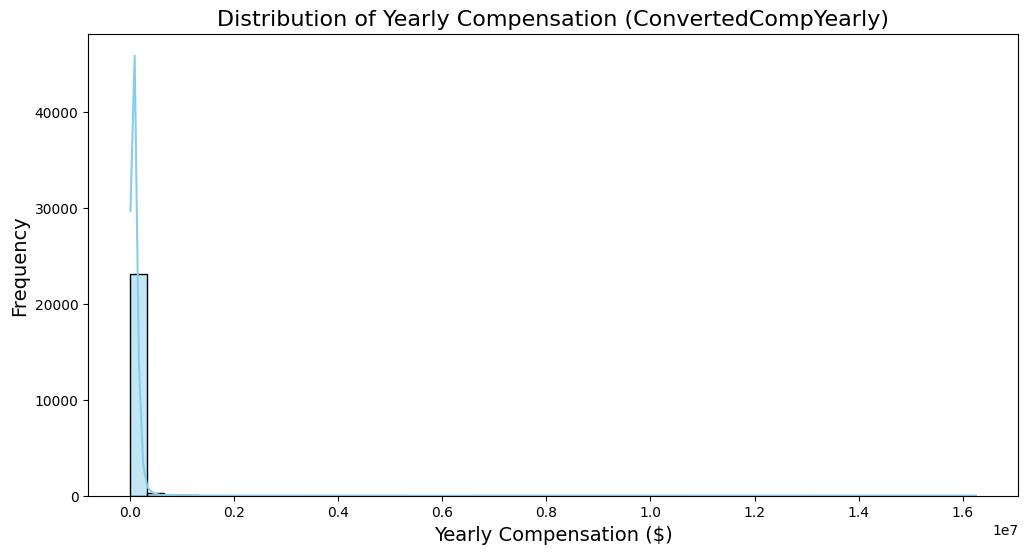

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the histogram for ConvertedCompYearly
sns.histplot(data=df, x='ConvertedCompYearly', bins=50, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [6]:
# Calculate summary statistics
comp_stats = df['ConvertedCompYearly'].describe()

# Print the results
print(comp_stats)

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [7]:
print(df['ConvertedCompYearly'].isnull().sum())

42002


In [8]:
print(df['ConvertedCompYearly'].value_counts())

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


In [9]:
print(df['ConvertedCompYearly'].mean())

86155.28726264134


In [10]:
print(df['ConvertedCompYearly'].min())

1.0


In [11]:
print(df['ConvertedCompYearly'].max())

16256603.0


In [17]:
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


/tmp/ipykernel_300/2595045530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


In [18]:
print(df['ConvertedCompYearly'].isnull().sum())

0


In [19]:
print((df['ConvertedCompYearly'] > 600000).sum())


98


In [20]:
df_cl3 = df[df['ConvertedCompYearly'] <= 646426]

In [21]:
print(df_cl3.shape)

(65348, 114)


In [22]:
df_cleaned = df_cl3

/tmp/ipykernel_300/3895622856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log_Compensation'] = df_cleaned['ConvertedCompYearly'].apply(lambda x: np.log(x) if x > 0 else 0)


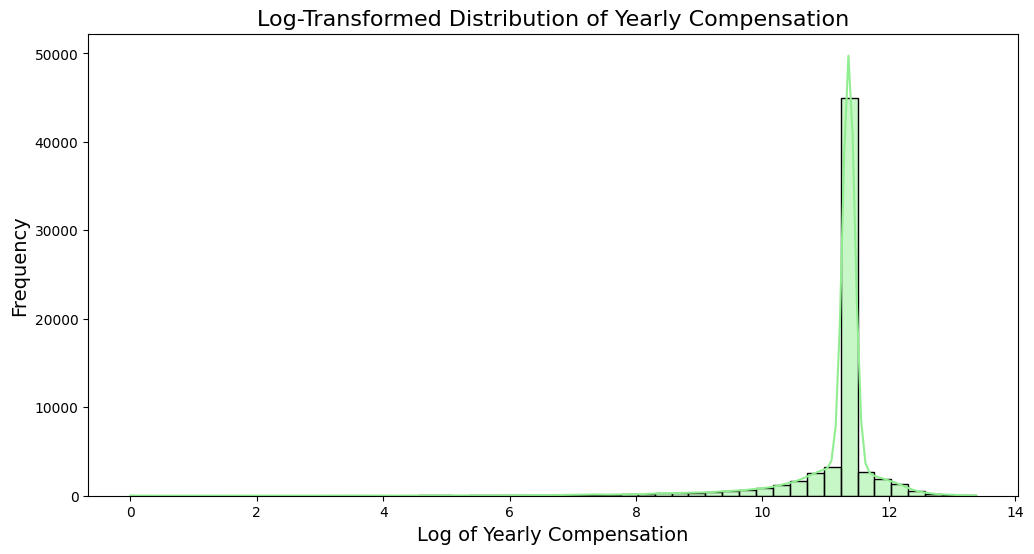

In [24]:
import numpy as np
df_cleaned['Log_Compensation'] = df_cleaned['ConvertedCompYearly'].apply(lambda x: np.log(x) if x > 0 else 0)

# Plot the histogram of log-transformed compensation
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='Log_Compensation', bins=50, kde=True, color='lightgreen')
plt.title('Log-Transformed Distribution of Yearly Compensation', fontsize=16)
plt.xlabel('Log of Yearly Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [25]:
full_time_employees = df[df['Employment'] == 'Employed, full-time']


In [26]:
print(full_time_employees['ConvertedCompYearly'].isnull().sum())

0


In [27]:
print(full_time_employees['ConvertedCompYearly'].value_counts())

ConvertedCompYearly
86155.287263     21455
64444.000000       238
53703.000000       224
75184.000000       180
150000.000000      170
                 ...  
3095.000000          1
3338.000000          1
270.000000           1
14341.000000         1
151921.000000        1
Name: count, Length: 4981, dtype: int64


In [28]:
print("mean", full_time_employees['ConvertedCompYearly'].mean())
print("mod", full_time_employees['ConvertedCompYearly'].mode())
print("median", full_time_employees['ConvertedCompYearly'].median())

mean 87401.15220460466
mod 0    86155.287263
Name: ConvertedCompYearly, dtype: float64
median 86155.28726264134


In [29]:
print("mod", full_time_employees['ConvertedCompYearly'].mode())


mod 0    86155.287263
Name: ConvertedCompYearly, dtype: float64


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



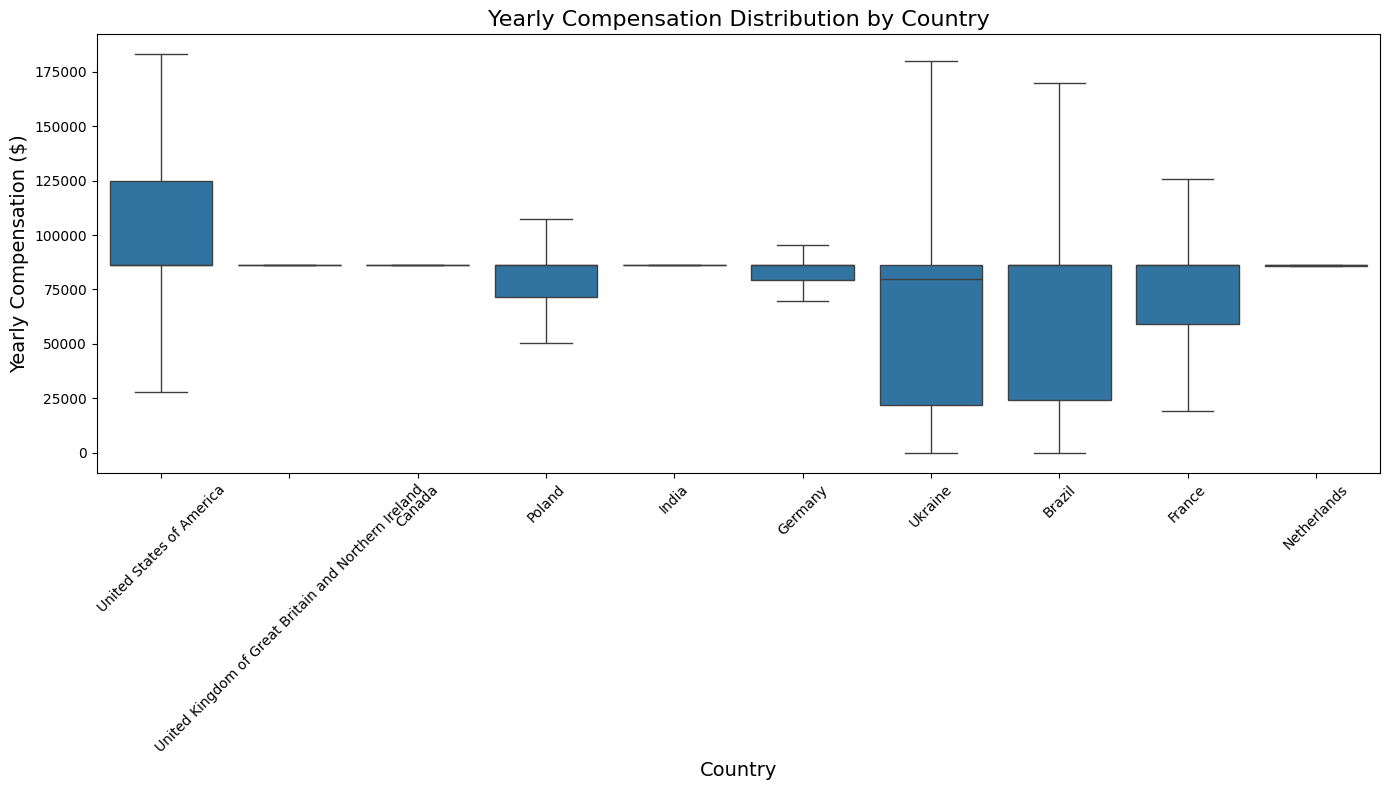

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with missing compensation values
#df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Select the top N countries by sample size for better visualization
top_countries = df_cleaned['Country'].value_counts().nlargest(10).index
df_top_countries = df_cleaned[df_cleaned['Country'].isin(top_countries)]

# Create a box plot for compensation by country
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly', showfliers=False)
plt.title('Yearly Compensation Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Yearly Compensation ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [31]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Display the size of the refined dataset
print(f"Original Dataset Size: {len(df)}")
print(f"Refined Dataset Size: {len(df_refined)}")

Original Dataset Size: 65437
Refined Dataset Size: 42002


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.110067        0.014537
WorkExp                         0.110067  1.000000       -0.026490
JobSatPoints_1                  0.014537 -0.026490        1.000000


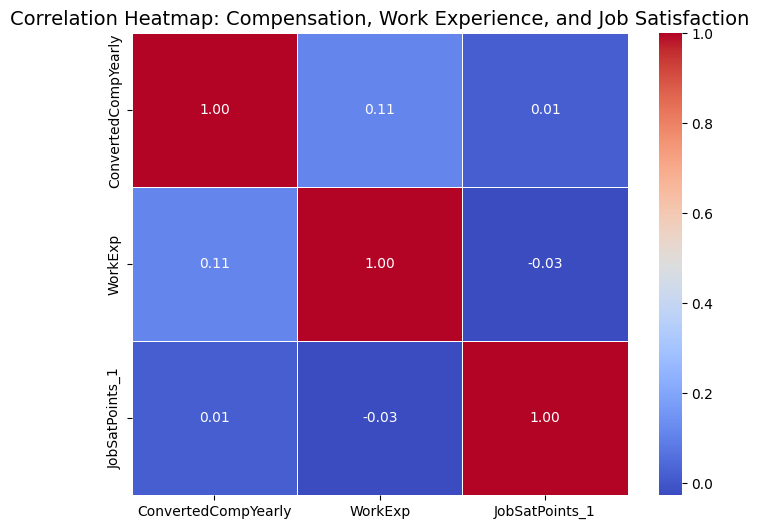

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation analysis
correlation_data = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction', fontsize=14)
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


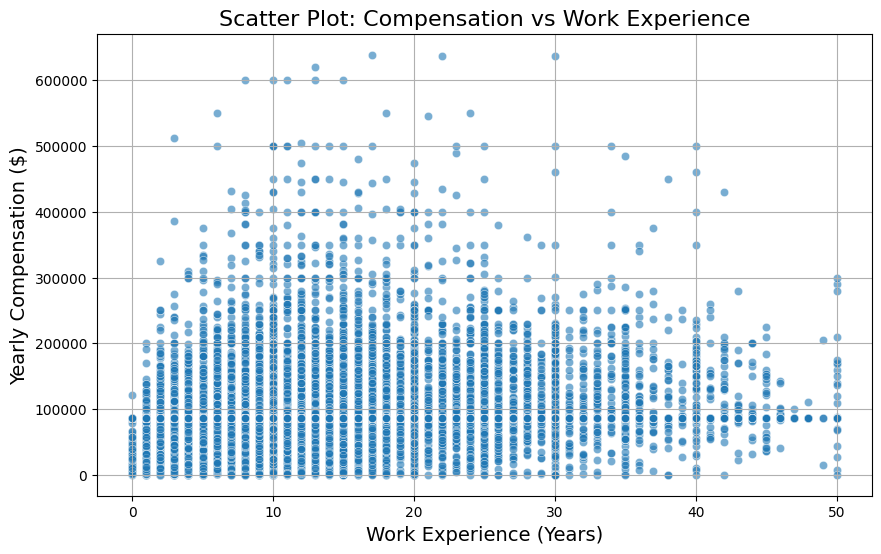

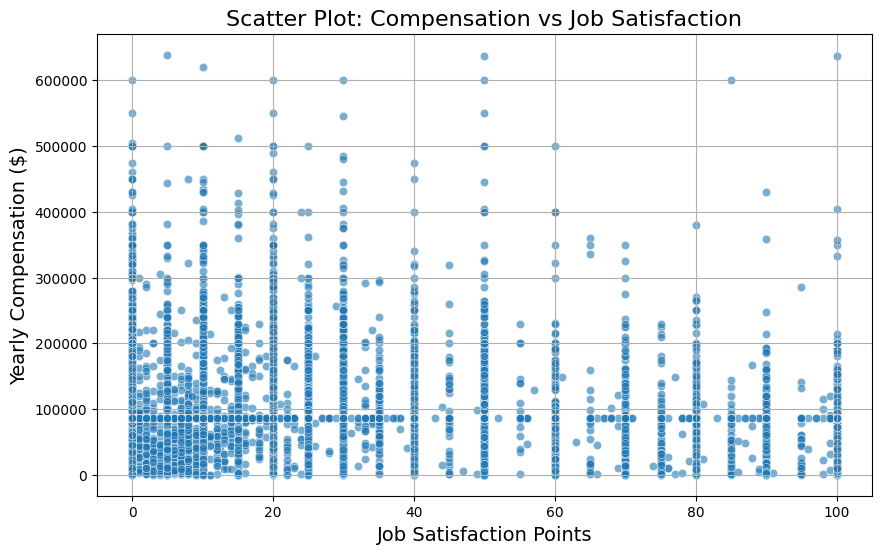

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for ConvertedCompYearly vs WorkExp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='WorkExp', y='ConvertedCompYearly', alpha=0.6)
plt.title('Scatter Plot: Compensation vs Work Experience', fontsize=16)
plt.xlabel('Work Experience (Years)', fontsize=14)
plt.ylabel('Yearly Compensation ($)', fontsize=14)
plt.grid(True)
plt.show()

# Scatter plot for ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6)
plt.title('Scatter Plot: Compensation vs Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction Points', fontsize=14)
plt.ylabel('Yearly Compensation ($)', fontsize=14)
plt.grid(True)
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
